In [188]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import f_classif,SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
firewall = pd.read_csv("C:\\Users\\dharu\\OneDrive\\Desktop\\ISROSpaceHackathon\\firewall.csv")

C:\Users\dharu\AppData\Local\Temp\ipykernel_10448\2255539360.py:1: DtypeWarning: Columns (49,58,59,60,62,63,64,65,66,67,69,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  firewall = pd.read_csv("C:\\Users\\dharu\\OneDrive\\Desktop\\ISROSpaceHackathon\\firewall.csv")


In [3]:
firewall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380837 entries, 0 to 380836
Data columns (total 74 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   logver            380837 non-null  int64  
 1   timestamp         380837 non-null  int64  
 2   tz                380837 non-null  object 
 3   devname           380837 non-null  object 
 4   devid             380837 non-null  object 
 5   vd                380837 non-null  object 
 6   date              380837 non-null  object 
 7   time              380837 non-null  object 
 8   logid             380837 non-null  object 
 9   type              380837 non-null  object 
 10  subtype           380837 non-null  object 
 11  level             380837 non-null  object 
 12  eventtime         380837 non-null  int64  
 13  srcip             378837 non-null  object 
 14  srcport           284987 non-null  float64
 15  srcintf           378837 non-null  object 
 16  srcintfrole       37

In [4]:
df = firewall.copy()

In [5]:
numerical_features = ['srcport', 'dstport', 'sessionid', 'proto', 'policyid', 'duration', 'sentbyte', 'rcvdbyte', 'sentpkt', 'rcvdpkt', 'wanin', 'wanout', 'lanin', 'lanout', 'sentdelta', 'rcvddelta', 'crscore', 'craction', 'cpu', 'mem', 'totalsession', 'disk', 'setuprate', 'disklograte', 'fazlograte', 'count', 'incidentserialno', 'countips']
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

In [6]:
categorical_features = ['srcip', 'srcintf', 'srcintfrole', 'dstip', 'dstintf', 'dstintfrole', 'poluuid', 'action', 'policytype', 'dstcountry', 'srccountry', 'trandisp', 'appcat', 'user', 'ui', 'status', 'reason', 'log', 'eventtype', 'severity', 'attack', 'direction', 'profile', 'ref', 'utmaction', 'bandwidth']
df[categorical_features] = df[categorical_features].fillna(method='ffill')

In [7]:
columns_to_drop = ['logdesc', 'hostname', 'msg', 'app', 'cpu', 'mem', 'totalsession', 'disk', 'bandwidth', 'user', 'ui', 'status', 'count', 'reason', 'log', 'eventtype', 'severity', 'attack', 'direction', 'attackid', 'profile', 'ref', 'incidentserialno', 'utmaction', 'countips']
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380837 entries, 0 to 380836
Data columns (total 49 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   logver       380837 non-null  int64  
 1   timestamp    380837 non-null  int64  
 2   tz           380837 non-null  object 
 3   devname      380837 non-null  object 
 4   devid        380837 non-null  object 
 5   vd           380837 non-null  object 
 6   date         380837 non-null  object 
 7   time         380837 non-null  object 
 8   logid        380837 non-null  object 
 9   type         380837 non-null  object 
 10  subtype      380837 non-null  object 
 11  level        380837 non-null  object 
 12  eventtime    380837 non-null  int64  
 13  srcip        380837 non-null  object 
 14  srcport      380837 non-null  float64
 15  srcintf      380837 non-null  object 
 16  srcintfrole  380837 non-null  object 
 17  dstip        380837 non-null  object 
 18  dstport      380837 non-

In [9]:
df[["service","crlevel"]] = df[["service","crlevel"]].fillna(method='ffill')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380837 entries, 0 to 380836
Data columns (total 49 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   logver       380837 non-null  int64  
 1   timestamp    380837 non-null  int64  
 2   tz           380837 non-null  object 
 3   devname      380837 non-null  object 
 4   devid        380837 non-null  object 
 5   vd           380837 non-null  object 
 6   date         380837 non-null  object 
 7   time         380837 non-null  object 
 8   logid        380837 non-null  object 
 9   type         380837 non-null  object 
 10  subtype      380837 non-null  object 
 11  level        380837 non-null  object 
 12  eventtime    380837 non-null  int64  
 13  srcip        380837 non-null  object 
 14  srcport      380837 non-null  float64
 15  srcintf      380837 non-null  object 
 16  srcintfrole  380837 non-null  object 
 17  dstip        380837 non-null  object 
 18  dstport      380837 non-

In [17]:
df["crlevel"] = df["crlevel"].fillna(method='ffill')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380837 entries, 0 to 380836
Data columns (total 49 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   logver       380837 non-null  int64  
 1   timestamp    380837 non-null  int64  
 2   tz           380837 non-null  object 
 3   devname      380837 non-null  object 
 4   devid        380837 non-null  object 
 5   vd           380837 non-null  object 
 6   date         380837 non-null  object 
 7   time         380837 non-null  object 
 8   logid        380837 non-null  object 
 9   type         380837 non-null  object 
 10  subtype      380837 non-null  object 
 11  level        380837 non-null  object 
 12  eventtime    380837 non-null  int64  
 13  srcip        380837 non-null  object 
 14  srcport      380837 non-null  float64
 15  srcintf      380837 non-null  object 
 16  srcintfrole  380837 non-null  object 
 17  dstip        380837 non-null  object 
 18  dstport      380837 non-

In [20]:
# Scoring criteria
criteria = {
    'duration': {'safe': 600, 'moderately_safe': 1800, 'unsafe': 3600},
    'sentbyte': {'safe': 1e8, 'moderately_safe': 5e7, 'unsafe': 1e7},
    'crscore': {'safe': 80, 'moderately_safe': 60, 'unsafe': 0},
}


In [50]:
def categorize(row):
    max_category = 'unknown'
    max_threshold = 0
    for feature, thresholds in criteria.items():
        if pd.notna(row[feature]):  # Skip NaN values
            for category, threshold in thresholds.items():
                if row[feature] >= threshold and threshold > max_threshold:
                    max_threshold = threshold
                    max_category = category     
    return max_category

In [51]:
df['category'] = df.apply(categorize, axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380837 entries, 0 to 380836
Data columns (total 50 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   logver       380837 non-null  int64  
 1   timestamp    380837 non-null  int64  
 2   tz           380837 non-null  object 
 3   devname      380837 non-null  object 
 4   devid        380837 non-null  object 
 5   vd           380837 non-null  object 
 6   date         380837 non-null  object 
 7   time         380837 non-null  object 
 8   logid        380837 non-null  object 
 9   type         380837 non-null  object 
 10  subtype      380837 non-null  object 
 11  level        380837 non-null  object 
 12  eventtime    380837 non-null  int64  
 13  srcip        380837 non-null  object 
 14  srcport      380837 non-null  float64
 15  srcintf      380837 non-null  object 
 16  srcintfrole  380837 non-null  object 
 17  dstip        380837 non-null  object 
 18  dstport      380837 non-

In [52]:
df.head()

,logver,timestamp,tz,devname,devid,vd,date,time,logid,type,...,lanout,sentdelta,rcvddelta,crscore,craction,crlevel,setuprate,disklograte,fazlograte,category
0,506141727,1698690294,"""UTC+5:30""","""FGT3600C_HA""","""FG3K6C3A15800081""","""root""",2023-10-30,23:54:54,"""0000000013""","""traffic""",...,1067.812715,1721.717462,87030.892007,20.254005,182180.75006,"""high""",18.145161,0.0,14.91129,unknown
1,506141727,1698690294,"""UTC+5:30""","""FGT3600C_HA""","""FG3K6C3A15800081""","""root""",2023-10-30,23:54:54,"""0000000013""","""traffic""",...,1067.812715,1721.717462,87030.892007,20.254005,182180.75006,"""high""",18.145161,0.0,14.91129,unknown
2,506141727,1698690294,"""UTC+5:30""","""FGT3600C_HA""","""FG3K6C3A15800081""","""root""",2023-10-30,23:54:54,"""0000000013""","""traffic""",...,1148.000000,1721.717462,87030.892007,20.254005,182180.75006,"""high""",18.145161,0.0,14.91129,unknown
3,506141727,1698690294,"""UTC+5:30""","""FGT3600C_HA""","""FG3K6C3A15800081""","""root""",2023-10-30,23:54:54,"""0000000013""","""traffic""",...,1067.812715,1721.717462,87030.892007,20.254005,182180.75006,"""high""",18.145161,0.0,14.91129,unknown
4,506141727,1698690295,"""UTC+5:30""","""FGT3600C_HA""","""FG3K6C3A15800081""","""root""",2023-10-30,23:54:55,"""0000000013""","""traffic""",...,1148.000000,1721.717462,87030.892007,20.254005,182180.75006,"""high""",18.145161,0.0,14.91129,unknown


In [53]:
df["category"].value_counts()

unknown            379360
safe                  744
unsafe                383
moderately_safe       350
Name: category, dtype: int64

In [72]:
ob = []
fl = []
num = []
for i in df.columns:
    if df[i].dtype == "object":
        ob.append(i)
for i in df.columns:
    if df[i].dtype == "int64":
        num.append(i)
for i in df.columns:
    if df[i].dtype == "float64":
        fl.append(i)
print(fl)
print(num)
print(ob)

['srcport', 'dstport', 'sessionid', 'proto', 'policyid', 'duration', 'sentbyte', 'rcvdbyte', 'sentpkt', 'rcvdpkt', 'wanin', 'wanout', 'lanin', 'lanout', 'sentdelta', 'rcvddelta', 'crscore', 'craction', 'setuprate', 'disklograte', 'fazlograte']
['logver', 'timestamp', 'eventtime']
['tz', 'devname', 'devid', 'vd', 'date', 'time', 'logid', 'type', 'subtype', 'level', 'srcip', 'srcintf', 'srcintfrole', 'dstip', 'dstintf', 'dstintfrole', 'poluuid', 'action', 'policytype', 'service', 'dstcountry', 'srccountry', 'trandisp', 'appcat', 'crlevel', 'category']


In [73]:
lab = LabelEncoder()
mod_data = df.copy()
for i in ob:
    mod_data[i] = lab.fit_transform(mod_data[i])

In [74]:
mod_data.head()

,logver,timestamp,tz,devname,devid,vd,date,time,logid,type,...,lanout,sentdelta,rcvddelta,crscore,craction,crlevel,setuprate,disklograte,fazlograte,category
0,506141727,1698690294,0,0,1,0,0,18376,1,1,...,1067.812715,1721.717462,87030.892007,20.254005,182180.75006,1,18.145161,0.0,14.91129,2
1,506141727,1698690294,0,0,1,0,0,18376,1,1,...,1067.812715,1721.717462,87030.892007,20.254005,182180.75006,1,18.145161,0.0,14.91129,2
2,506141727,1698690294,0,0,1,0,0,18376,1,1,...,1148.000000,1721.717462,87030.892007,20.254005,182180.75006,1,18.145161,0.0,14.91129,2
3,506141727,1698690294,0,0,1,0,0,18376,1,1,...,1067.812715,1721.717462,87030.892007,20.254005,182180.75006,1,18.145161,0.0,14.91129,2
4,506141727,1698690295,0,0,1,0,0,18377,1,1,...,1148.000000,1721.717462,87030.892007,20.254005,182180.75006,1,18.145161,0.0,14.91129,2


In [77]:
features = []
for i in mod_data.columns:
    if i != "category":
        features.append(i)
X = mod_data[features]
y = mod_data["category"]

In [80]:
mod_data.corr()

,logver,timestamp,tz,devname,devid,vd,date,time,logid,type,...,lanout,sentdelta,rcvddelta,crscore,craction,crlevel,setuprate,disklograte,fazlograte,category
logver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,NaN,1.000000,NaN,NaN,-3.005293e-03,NaN,0.255622,0.809355,2.281205e-02,-2.344017e-02,...,-2.783008e-02,2.796096e-03,2.705315e-03,8.523314e-02,-8.521532e-02,-0.207639,-3.551997e-03,NaN,-3.161449e-03,-1.310875e-02
tz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
devname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
devid,NaN,-0.003005,NaN,NaN,1.000000e+00,NaN,-0.001679,-0.001879,-1.956723e-01,1.904222e-01,...,-3.326002e-14,3.062454e-15,2.982215e-15,1.100915e-13,-1.101315e-13,0.002924,5.206807e-01,NaN,5.802594e-01,-4.738390e-04
vd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,NaN,0.255622,NaN,NaN,-1.679253e-03,NaN,1.000000,-0.360918,5.190150e-03,-7.892096e-03,...,-6.475654e-03,1.808153e-03,1.742998e-03,-4.599851e-03,4.603945e-03,-0.028538,1.471368e-04,NaN,-5.648371e-04,-6.997182e-03
time,NaN,0.809355,NaN,NaN,-1.879247e-03,NaN,-0.360918,1.000000,1.885643e-02,-1.782156e-02,...,-2.292370e-02,1.599019e-03,1.551023e-03,8.502004e-02,-8.500530e-02,-0.182985,-3.516647e-03,NaN,-2.706800e-03,-8.400965e-03
logid,NaN,0.022812,NaN,NaN,-1.956723e-01,NaN,0.005190,0.018856,1.000000e+00,-9.172189e-01,...,-2.115596e-15,4.577895e-03,3.757604e-03,1.485036e-02,-1.341247e-02,-0.012194,1.204166e-14,NaN,2.615422e-15,-6.535229e-02
type,NaN,-0.023440,NaN,NaN,1.904222e-01,NaN,-0.007892,-0.017822,-9.172189e-01,1.000000e+00,...,8.283481e-16,-2.051533e-16,-1.053110e-16,9.810382e-04,8.066279e-15,0.008054,-1.207026e-14,NaN,-2.605042e-15,-2.480868e-03


In [97]:
sel = SelectKBest(score_func = f_classif,k = 12)
ch = SelectKBest(score_func = chi2,k=12)
data = sel.fit_transform(X,y)
ch_data = ch.fit_transform(X,y)
mod_features = sel.get_support()
ch_features = ch.get_support()
f_cl = X.columns[mod_features]
chi_cl = X.columns[ch_features]

C:\Users\dharu\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2  3  5 26 30 35 47] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\dharu\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [124]:
smote = SMOTE(random_state=42)
X_train_f,X_test_f,y_train_f,y_test_f = train_test_split(X[f_cl],y) #Features found using f score
X_train_chi,X_test_chi,y_train_chi,y_test_chi = train_test_split(X[chi_cl],y) #Features found using chi2 scores
X_resampled_chi, y_resampled_chi = smote.fit_resample(X_train_chi, y_train_chi) #Resampling for f score based features
X_resampled_f, y_resampled_f = smote.fit_resample(X_train_f, y_train_f) #Resampling for chi square based features

In [128]:
log = LogisticRegression()
log.fit(X_resampled_chi,y_resampled_chi)

LogisticRegression()

In [129]:
print(classification_report(log.predict(X_test_chi),y_test_chi))

              precision    recall  f1-score   support

           0       0.74      0.06      0.11      1404
           1       0.47      0.06      0.11      1557
           2       0.97      1.00      0.98     91874
           3       0.50      0.13      0.21       375

    accuracy                           0.97     95210
   macro avg       0.67      0.31      0.35     95210
weighted avg       0.96      0.97      0.95     95210



In [132]:
dec = DecisionTreeClassifier()
dec.fit(X_resampled_chi,y_resampled_chi)

DecisionTreeClassifier()

In [133]:
print(classification_report(y_test_chi,dec.predict(X_test_chi)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00     94806
           3       1.00      1.00      1.00        98

    accuracy                           1.00     95210
   macro avg       1.00      1.00      1.00     95210
weighted avg       1.00      1.00      1.00     95210



In [139]:
ada = AdaBoostClassifier()
ada.fit(X_resampled_chi,y_resampled_chi)

AdaBoostClassifier()

In [140]:
print(classification_report(y_test_chi,ada.predict(X_test_chi)))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52       108
           1       0.00      0.00      0.00       198
           2       1.00      1.00      1.00     94806
           3       1.00      1.00      1.00        98

    accuracy                           1.00     95210
   macro avg       0.59      0.75      0.63     95210
weighted avg       1.00      1.00      1.00     95210



C:\Users\dharu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dharu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dharu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
ran = RandomForestClassifier()
ran.fit(X_resampled_f,y_resampled_f)

RandomForestClassifier()

In [142]:
print(classification_report(y_test_f,ran.predict(X_test_f)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       1.00      0.99      1.00       189
           2       1.00      1.00      1.00     94835
           3       1.00      1.00      1.00        95

    accuracy                           1.00     95210
   macro avg       1.00      1.00      1.00     95210
weighted avg       1.00      1.00      1.00     95210



In [148]:
pc = PCA(n_components = 12)
feats = pc.fit_transform(X)

In [150]:
feature_contributions = pd.DataFrame(pc.components_, columns=X.columns)
feature_contributions

,logver,timestamp,tz,devname,devid,vd,date,time,logid,type,...,lanin,lanout,sentdelta,rcvddelta,crscore,craction,crlevel,setuprate,disklograte,fazlograte
0,0.000000e+00,0.000035,0.000000e+00,0.000000e+00,-2.709384e-17,0.000000e+00,4.897503e-10,0.000026,2.650869e-09,1.112021e-15,...,-3.202420e-06,-3.202420e-06,0.006502,0.374439,-1.583981e-10,8.406763e-07,7.824211e-10,-1.023829e-15,0.0,-6.463811e-16
1,-1.294537e-16,-0.000054,-0.000000e+00,-0.000000e+00,1.798107e-16,3.761582e-37,-6.144137e-11,-0.000053,3.750674e-09,-4.252386e-15,...,4.455871e-06,4.455871e-06,0.012607,0.726690,-3.777899e-10,1.984804e-06,2.864572e-09,7.503602e-15,-0.0,4.745544e-15
2,6.854191e-18,-0.017640,0.000000e+00,0.000000e+00,1.561328e-13,0.000000e+00,-1.762020e-07,-0.014331,4.889132e-08,-2.230109e-11,...,1.970980e-05,1.970980e-05,-0.000143,-0.007483,-6.788597e-07,3.558091e-03,2.466110e-07,6.057653e-12,0.0,3.823446e-12
3,-2.239288e-17,-0.001286,3.493164e-18,0.000000e+00,1.164620e-13,0.000000e+00,-1.908979e-08,-0.000928,-1.490930e-07,1.212865e-12,...,-2.676187e-07,-2.676187e-07,0.010043,0.575625,-6.907470e-08,3.610668e-04,1.633635e-09,4.448935e-12,0.0,2.815404e-12
4,-4.914678e-18,-0.010709,-7.190221e-19,2.364281e-19,2.653155e-11,0.000000e+00,-1.102607e-07,-0.008629,-3.719478e-07,1.458334e-09,...,1.162668e-05,1.162668e-05,0.000240,0.003476,4.452123e-05,-2.334834e-01,-1.159552e-06,1.447747e-09,0.0,9.502130e-10
5,2.242375e-17,0.019619,4.674598e-19,1.917847e-17,-7.448836e-11,-1.110223e-16,-3.116058e-07,0.025418,6.029125e-07,-3.280619e-09,...,2.427497e-05,2.427497e-05,-0.000080,-0.000654,1.835304e-04,-9.626473e-01,-7.204200e-06,-2.697771e-09,-0.0,-1.648176e-09
6,-8.918616e-17,0.476013,6.153434e-18,-1.161291e-16,-7.456862e-09,5.551115e-17,-5.127393e-06,0.571252,4.415248e-06,-3.226973e-07,...,7.318562e-06,7.318562e-06,0.000115,0.001355,-6.867169e-06,3.610249e-02,-6.360391e-06,-3.002545e-07,-0.0,-1.871996e-07
7,-6.057429e-18,0.018455,-2.242733e-18,-1.501938e-17,-8.559853e-10,2.220446e-16,3.898033e-06,-0.054351,-8.179654e-07,-1.573001e-08,...,1.537217e-04,1.537217e-04,-0.000247,-0.000341,-2.474087e-05,1.300573e-01,6.753568e-06,6.051209e-08,0.0,4.262234e-08
8,-4.151828e-17,-0.091846,5.257318e-19,-3.762350e-17,2.829465e-09,2.775558e-17,-2.160317e-05,0.311720,1.125158e-06,1.431833e-08,...,-6.970060e-04,-6.970060e-04,-0.001143,-0.000167,-4.465089e-06,2.355868e-02,2.584588e-06,-3.109450e-07,-0.0,-2.031001e-07
9,-2.633802e-17,0.272037,-6.459641e-18,2.661938e-17,-4.014352e-11,1.665335e-16,5.477917e-05,-0.751428,3.084215e-06,8.525728e-08,...,1.659134e-03,1.659134e-03,0.001779,0.000296,3.889443e-07,-2.010263e-03,-1.273331e-06,1.184059e-07,0.0,5.646490e-09


In [151]:
most_important_features = feature_contributions.idxmax(axis=1)

In [154]:
pca_analyzed = []
for i, feature in enumerate(most_important_features):
    pca_analyzed.append(feature)
pca_analyzed

['rcvdbyte',
 'rcvddelta',
 'sentbyte',
 'rcvddelta',
 'srcport',
 'dstport',
 'time',
 'dstport',
 'dstport',
 'sentbyte',
 'sentbyte',
 'wanout']

In [158]:
smote = SMOTE(random_state=42)
X_train_pc,X_test_pc,y_train_pc,y_test_pc = train_test_split(X[pca_analyzed],y) #Features found using PCA Analysis
X_resampled_pc, y_resampled_pc = smote.fit_resample(X_train_pc, y_train_pc)

In [159]:
log.fit(X_resampled_pc,y_resampled_pc)

C:\Users\dharu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
print(classification_report(y_test_pc,log.predict(X_test_pc)))

              precision    recall  f1-score   support

           0       0.26      0.88      0.40        86
           1       0.05      0.53      0.09       178
           2       1.00      0.98      0.99     94841
           3       0.38      0.77      0.51       105

    accuracy                           0.98     95210
   macro avg       0.42      0.79      0.50     95210
weighted avg       1.00      0.98      0.99     95210



In [161]:
ran.fit(X_resampled_pc,y_resampled_pc)

RandomForestClassifier()

In [162]:
print(classification_report(y_test_pc,ran.predict(X_test_pc)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        86
           1       0.67      0.79      0.72       178
           2       1.00      1.00      1.00     94841
           3       0.91      0.94      0.93       105

    accuracy                           1.00     95210
   macro avg       0.86      0.91      0.88     95210
weighted avg       1.00      1.00      1.00     95210



In [163]:
dec.fit(X_resampled_pc,y_resampled_pc)

DecisionTreeClassifier()

In [164]:
print(classification_report(y_test_pc,dec.predict(X_test_pc)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        86
           1       0.58      0.76      0.66       178
           2       1.00      1.00      1.00     94841
           3       0.90      0.90      0.90       105

    accuracy                           1.00     95210
   macro avg       0.81      0.89      0.85     95210
weighted avg       1.00      1.00      1.00     95210



In [179]:
print(X_resampled_pc.shape)
print(y_resampled_pc.shape)

(1138076, 12)
(1138076,)


In [184]:
y_resampled_pc_onehot = to_categorical(y_resampled_pc, num_classes=4)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_pc, y_resampled_pc_onehot, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Use softmax for 4 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(X_test)

Epoch 1/10
22762/22762 [==============================] - 60s 3ms/step - loss: 0.2415 - accuracy: 0.9179 - val_loss: 0.1884 - val_accuracy: 0.9327
Epoch 2/10
22762/22762 [==============================] - 60s 3ms/step - loss: 0.1352 - accuracy: 0.9615 - val_loss: 0.1157 - val_accuracy: 0.9704
Epoch 3/10
22762/22762 [==============================] - 58s 3ms/step - loss: 0.1183 - accuracy: 0.9663 - val_loss: 0.1136 - val_accuracy: 0.9687
Epoch 4/10
22762/22762 [==============================] - 61s 3ms/step - loss: 0.1086 - accuracy: 0.9692 - val_loss: 0.1055 - val_accuracy: 0.9658
Epoch 5/10
22762/22762 [==============================] - 59s 3ms/step - loss: 0.1013 - accuracy: 0.9715 - val_loss: 0.0998 - val_accuracy: 0.9724
Epoch 6/10
22762/22762 [==============================] - 59s 3ms/step - loss: 0.0952 - accuracy: 0.9732 - val_loss: 0.0851 - val_accuracy: 0.9758
Epoch 7/10
22762/22762 [==============================] - 59s 3ms/step - loss: 0.0909 - accuracy: 0.9747 - val_loss: 0

In [186]:
history = model.fit(X_train, y_train, epochs=9, batch_size=32, validation_split=0.2)

Epoch 1/9
22762/22762 [==============================] - 62s 3ms/step - loss: 0.0790 - accuracy: 0.9782 - val_loss: 0.0874 - val_accuracy: 0.9752
Epoch 2/9
22762/22762 [==============================] - 60s 3ms/step - loss: 0.0770 - accuracy: 0.9788 - val_loss: 0.0785 - val_accuracy: 0.9772
Epoch 3/9
22762/22762 [==============================] - 59s 3ms/step - loss: 0.0751 - accuracy: 0.9792 - val_loss: 0.0761 - val_accuracy: 0.9793
Epoch 4/9
22762/22762 [==============================] - 60s 3ms/step - loss: 0.0737 - accuracy: 0.9797 - val_loss: 0.0743 - val_accuracy: 0.9813
Epoch 5/9
22762/22762 [==============================] - 59s 3ms/step - loss: 0.0723 - accuracy: 0.9798 - val_loss: 0.0660 - val_accuracy: 0.9818
Epoch 6/9
22762/22762 [==============================] - 59s 3ms/step - loss: 0.0710 - accuracy: 0.9803 - val_loss: 0.0728 - val_accuracy: 0.9782
Epoch 7/9
22762/22762 [==============================] - 60s 3ms/step - loss: 0.0702 - accuracy: 0.9805 - val_loss: 0.0637 -

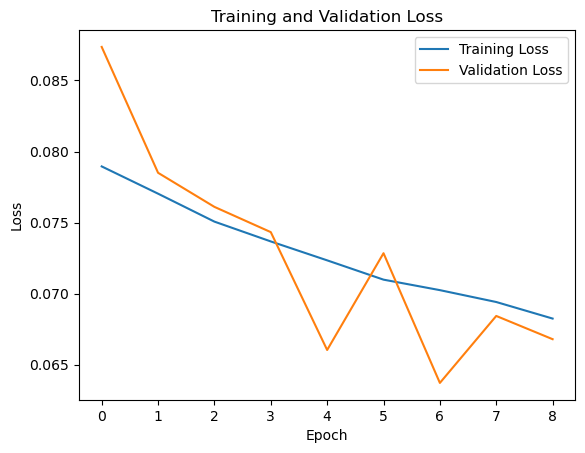

In [189]:
history = model.history.history
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()